In [1]:
config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":300e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": [["B1|X2","B2|X2"],["B1|X3","B2|X3"]],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

netlist="""

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

.subckt psquid  3  5 
L1                 3        1   #L1(1.75)pH fcheck
L2                 3        4   #L1(1.75)pH fcheck
B1                 1        5   jjmod area=0.5
R1                 1        5   15.88ohm
B2                 4        5   pjjmod area=0.5
R2                 4        5   15.88ohm
.ends

* Example JTL Basic
VIN                     1       0       pwl(0 0 300p 0 301p 0.5175mV 302p 0.5175mV 303p 0  400p 0 401p 0.5175mV 402p 0.5175mV 403p 0  500p 0 501p 0.5175mV 502p 0.5175mV 503p 0)
X1      psquid          1       0
L1                      1       2       18pH
R1                      2       100     50ohm
L2                      2       3       18pH
X2      psquid          3       0      
L3                      3       4       18pH
R2                      4       100     50ohm
L4                      4       5       18pH
X3      psquid          5       0       
R3                      5       6       8.32ohm
L5                      6       0       2pH
Vb                      100     0       pwl(0ps 0mV 100ps 1.0mV)

.tran 0.25p 1000p 0 0.25p
.print PHASE ?
.print PHASE ?

.print PHASE ?
.print PHASE ?
.end
"""

In [2]:
from optimize.pyjosim import simulation
from optimize import data
import importlib
importlib.reload(data)
d = data.Data(netlist, config_data)

print(d.sim_data)
print(d.vdf)

･ (Period to calculate initial phase)		=  1e-10  ~  3e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]


.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

.subckt psquid  3  5 
L1                 3        1   #(L1)pH fcheck
L2                 3        4   #(L1)pH fcheck
B1                 1        5   jjmod area=0.5
R1                 1        5   15.88ohm
B2                 4        5   pjjmod area=0.5
R2                 4        5   15.88ohm
.ends

* Example JTL Basic
VIN                     1       0       pwl(0 0 300p 0 301p 0.5175mV 302p 0.5175mV 303p 0  400p 0 401p 0.5175mV 402p 0.5175mV 403p 0  500p 0 501p 0.5175mV 502p 0.5175mV 503p 0)
X1      psquid          1       0
L1                      1       2       18pH
R1                      2       100     50ohm
L2                      2      

{'time': 3.09e-10, 'phase': 1, 'element': 'P(B1|X2+B2|X2)'}
{'time': 4.09e-10, 'phase': 2, 'element': 'P(B1|X2+B2|X2)'}
{'time': 5.09e-10, 'phase': 3, 'element': 'P(B1|X2+B2|X2)'}
{'time': 3.165e-10, 'phase': 1, 'element': 'P(B1|X3+B2|X3)'}
{'time': 4.165e-10, 'phase': 2, 'element': 'P(B1|X3+B2|X3)'}
{'time': 5.165e-10, 'phase': 3, 'element': 'P(B1|X3+B2|X3)'}


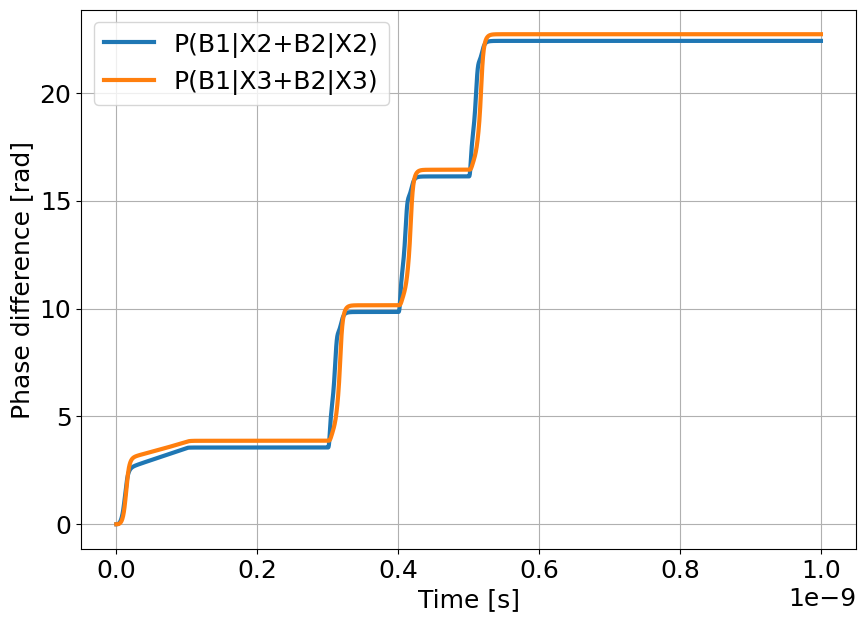

In [3]:
l = d.default_simulation()
for i in l:
    print(i)